In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1) + k2 * (x2 - x1)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1)) / m2]
    return f

In [2]:

# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 6.0
k2 = 4.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = 2.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25
numpoints = 500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

#La solución analítica es:
#X1(t)=cos(sqrt(2)*t)
#X2(t)=2*cos(sqrt(2)*t)
#El arreglo W1 tiene como columna 0 a x1 y como columna 2 a x2

with open('two_springs1.dat', 'w') as f: # Print & save the solution. 
    for t1, w1 in zip(t, wsol): print(t1, w1[0], w1[1], w1[2], w1[3],np.abs((w1[0]-(np.cos(np.sqrt(2)*t1)))/
(np.cos(np.sqrt(2)*t1))), np.abs((w1[2]-(2*np.cos(np.sqrt(2)*t1)))/(2*np.cos(np.sqrt(2)*t1))), file=f)

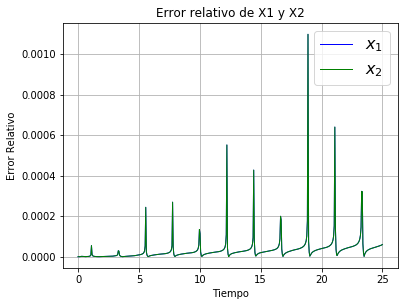

In [3]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as pl
%matplotlib inline

t, x1, xy, x2, y2, err1, err2 = loadtxt('two_springs1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

pl.xlabel('Tiempo')
pl.ylabel("Error Relativo")
grid(True)
#hold(True)
lw = 1

plot(t, err1, 'b', linewidth=lw)

plot(t, err2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Error relativo de X1 y X2')
savefig('ErrorRelativo2.1.png', dpi=100)

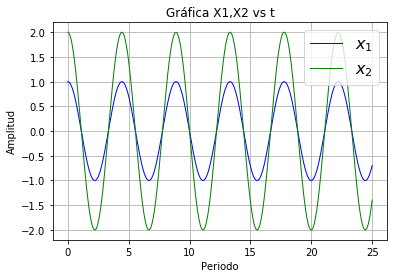

In [4]:
grid(True)
#hold(True)
lw = 1
#plot.xlim([0,20])
plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
pl.xlabel('Periodo')
pl.ylabel('Amplitud')

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica X1,X2 vs t')
savefig('two_springs2.1.1.png', dpi=100)

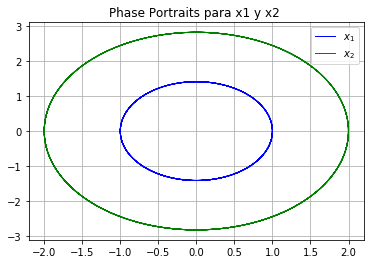

In [5]:
plot(x1,xy, 'b', linewidth=lw)
plot(x2,y2, 'g', linewidth=lw)
grid(True)
title('Phase Portraits para x1 y x2 ')
legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=10))
savefig("two_springs2.1.2.png", dpi=100)

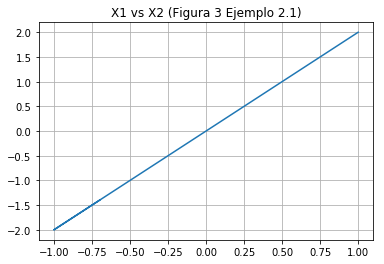

In [7]:
plot(x1,x2)
title("X1 vs X2 (Figura 3 Ejemplo 2.1)")
grid(True)
savefig("two_springs2.1.3.png", dpi=100)

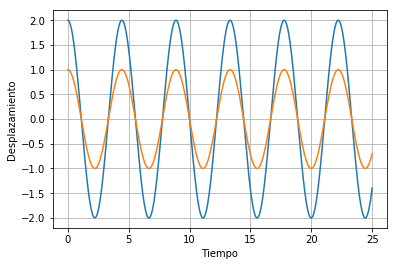

In [10]:
#Solución analítica: 
#X1(t)=cos(sqrt(2)*t)
#X2(t)=2*cos(sqrt(2)*t)

t = np.linspace(0,25,1000) # 100 linearly spaced numbers
y = 2*(np.cos(np.sqrt(2)*t))
z= np.cos(np.sqrt(2)*t) 
grid(True)
pl.xlabel('Tiempo')
pl.ylabel('Desplazamiento')
savefig("two_springs_solucion.png", dpi=100)


pl.plot(t,y)
pl.plot(t,z)